*Ranking the countries based on happiness of its citizens which is dependent on several social and financial metrics*

*The Happiness Score is a national average of the responses to the main life evaluation question asked based on GDP per capita, Healthy Life Expectancy, Social support, Freedom to make life choices, Generosity, Corruption Perception and other such features*

##### Loading Relevant Libraries

In [1]:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#Modules for Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram,linkage

#Libraries for Plotting 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Loading the World Happiness Report dataset

In [2]:
df = pd.read_csv("../input/world-happiness-report-2022/World Happiness Report 2022.csv")
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [3]:
# Renaming the columns
df.rename(columns = {'RANK':'Happiness Rank',
                     'Happiness score':'Happiness Score',
                     'Dystopia (1.83) + residual':'Dystopia Residual',
                     'Explained by: GDP per capita':'Economy(GDP per capita)',
                     'Explained by: Social support':'Social Support',
                     'Whisker-high':'Whisker_high', 
                     'Whisker-low':'Whisker_low',
                     'Explained by: Healthy life expectancy':'Healthy Life Expectancy',
                     'Explained by: Freedom to make life choices':'Freedom(Life Choices)',
                     'Explained by: Generosity':'Generosity', 
                     'Explained by: Perceptions of corruption':'Perceptions of Corruption'},
          inplace = True)

##### Exploring the Data 

In [4]:
df.columns

Index(['Happiness Rank', 'Country', 'Happiness Score', 'Whisker_high',
       'Whisker_low', 'Dystopia Residual', 'Economy(GDP per capita)',
       'Social Support', 'Healthy Life Expectancy', 'Freedom(Life Choices)',
       'Generosity', 'Perceptions of Corruption'],
      dtype='object')

In [5]:
# Re-ordering the columns
df = df.iloc[:, [1,0,2,3,4,6,7,8,9,10,11,5]]
df.head()

,Country,Happiness Rank,Happiness Score,Whisker_high,Whisker_low,Economy(GDP per capita),Social Support,Healthy Life Expectancy,Freedom(Life Choices),Generosity,Perceptions of Corruption,Dystopia Residual
0,Finland,1,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.109,0.534,2.518
1,Denmark,2,7.636,7.710,7.563,1.953,1.243,0.777,0.719,0.188,0.532,2.226
2,Iceland,3,7.557,7.651,7.464,1.936,1.320,0.803,0.718,0.270,0.191,2.320
3,Switzerland,4,7.512,7.586,7.437,2.026,1.226,0.822,0.677,0.147,0.461,2.153
4,Netherlands,5,7.415,7.471,7.359,1.945,1.206,0.787,0.651,0.271,0.419,2.137


In [6]:
df.loc[df["Country"] == 'India']

,Country,Happiness Rank,Happiness Score,Whisker_high,Whisker_low,Economy(GDP per capita),Social Support,Healthy Life Expectancy,Freedom(Life Choices),Generosity,Perceptions of Corruption,Dystopia Residual
135,India,136,3.777,3.828,3.726,1.167,0.376,0.471,0.647,0.198,0.123,0.795


In [7]:
# Statistical summary of the numerical and categorical data 
df.describe(include = 'all')

,Country,Happiness Rank,Happiness Score,Whisker_high,Whisker_low,Economy(GDP per capita),Social Support,Healthy Life Expectancy,Freedom(Life Choices),Generosity,Perceptions of Corruption,Dystopia Residual
count,146,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
unique,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,73.500000,5.553575,5.673589,5.433568,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781,1.831808
std,NaN,42.290661,1.086843,1.065621,1.109380,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514,0.534994
min,NaN,1.000000,2.404000,2.469000,2.339000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187000
25%,NaN,37.250000,4.888750,5.006250,4.754750,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250,1.555250
50%,NaN,73.500000,5.568500,5.680000,5.453000,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500,1.894500
75%,NaN,109.750000,6.305000,6.448750,6.190000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500,2.153000


In [8]:
# To get a quick overview of the dataset we use the info() function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    146 non-null    object 
 1   Happiness Rank             146 non-null    int64  
 2   Happiness Score            146 non-null    float64
 3   Whisker_high               146 non-null    float64
 4   Whisker_low                146 non-null    float64
 5   Economy(GDP per capita)    146 non-null    float64
 6   Social Support             146 non-null    float64
 7   Healthy Life Expectancy    146 non-null    float64
 8   Freedom(Life Choices)      146 non-null    float64
 9   Generosity                 146 non-null    float64
 10  Perceptions of Corruption  146 non-null    float64
 11  Dystopia Residual          146 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.8+ KB


In [9]:
#Detecting and counting missing values
df.isnull().sum()

Country                      0
Happiness Rank               0
Happiness Score              0
Whisker_high                 0
Whisker_low                  0
Economy(GDP per capita)      0
Social Support               0
Healthy Life Expectancy      0
Freedom(Life Choices)        0
Generosity                   0
Perceptions of Corruption    0
Dystopia Residual            0
dtype: int64

##### Correlating the features and plotting the correlation using Heatmaps

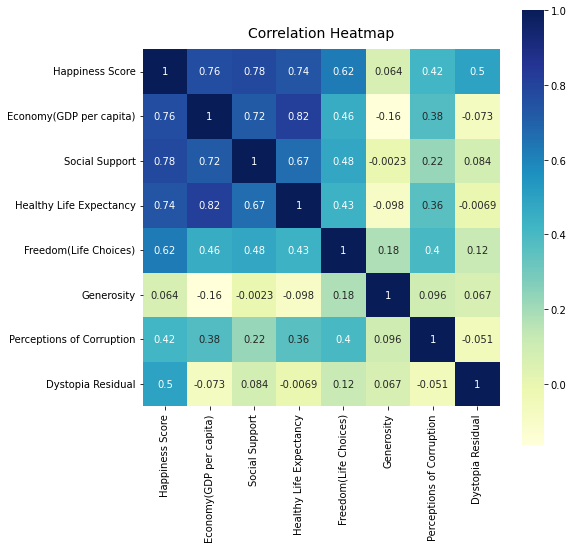

In [10]:
# Subsetting the data
df_hr = df[['Happiness Score','Economy(GDP per capita)','Social Support',
            'Healthy Life Expectancy','Freedom(Life Choices)',
            'Generosity','Perceptions of Corruption','Dystopia Residual']]

cor_mat = df_hr.corr()

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
htmp = sns.heatmap(cor_mat, square=True, annot=True, cmap="YlGnBu")
htmp.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


##### Agglomerative Clustering
##### Bottom Up Approach

* *Consider that individual datapoints are individual clusters*
* *Combine the datapoints which are closer to one another thus reducing the number of clusters*
* *Continue to shrink the clusters by recalculating the Euclidean Distance between the datapoints till no more datapoints are left and no more clusters can be formed*

In [11]:
def performAgglomerative(X, num_clusters):
    model = AgglomerativeClustering(n_clusters=num_clusters,
                                   affinity = "euclidean", #Distance method(Euclidean distance for numerical data)
                                   linkage='ward')
    cluster_pred = model.fit_predict(X)  #applying the clustering parameters on input features i.e X and create clusters
    return cluster_pred

In [12]:
cluster_pred = performAgglomerative(df_hr, 2) 
agglomerative = pd.DataFrame(cluster_pred) #List of clusters as a DataFrame
df_hr.insert((df_hr.shape[1]),'Cluster_Number', agglomerative) #Adding the column 'agglomerative' to original Dataframe

In [13]:
#Viewing the distinct clusters formed
df_hr["Cluster_Number"].unique()

array([0, 1])

##### Data Visualization using Scatter Plots

In [14]:
df_hr.columns

Index(['Happiness Score', 'Economy(GDP per capita)', 'Social Support',
       'Healthy Life Expectancy', 'Freedom(Life Choices)', 'Generosity',
       'Perceptions of Corruption', 'Dystopia Residual', 'Cluster_Number'],
      dtype='object')

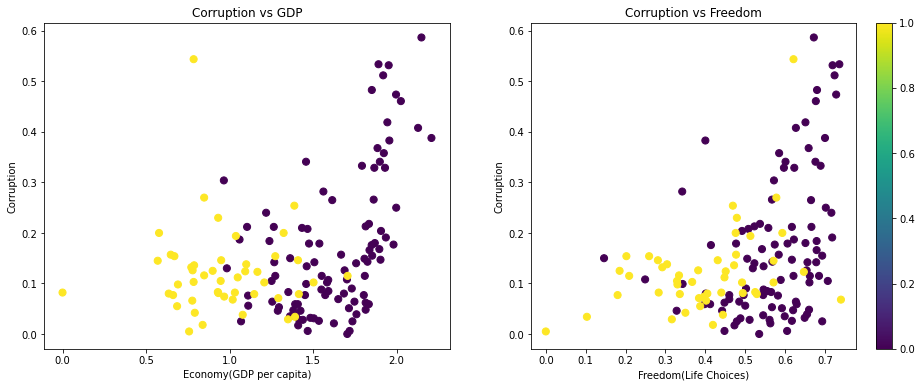

In [15]:
#Plotting Scatter Plots
fig, (ax0, ax1) = plt.subplots(ncols=2)
fig.set_figwidth(16)
fig.set_figheight(6)

#Scatter plot of Corruption vs GDP
scatter = ax0.scatter(df_hr['Economy(GDP per capita)'],df_hr['Perceptions of Corruption'],
                     c = agglomerative[0], s = 50)
ax0.set_title("Corruption vs GDP")
ax0.set_xlabel("Economy(GDP per capita)")
ax0.set_ylabel('Corruption')

#Scatter plot of Corruption vs Freedom
scatter = ax1.scatter(df_hr['Freedom(Life Choices)'],df_hr['Perceptions of Corruption'],
                     c = agglomerative[0], s = 50)
ax1.set_title("Corruption vs Freedom")
ax1.set_xlabel("Freedom(Life Choices)")
ax1.set_ylabel('Corruption')
               
plt.colorbar(scatter)

*Corruption vs GDP*
    
    Countries having more GDP seem to have high rates of corruption 

*Corruption vs Freedom*

    Countries having less corruption and more freedom to make their life decisions look happier 

##### Data Visualization via Box and Whisker Plots
    To describe the statistical metrics 

In [16]:
#Representing Cluster numbers as cluster names
clus_mapping = {0:'Clus_0',1:'Clus_1'}
df_hr['Cluster_Name'] = df_hr['Cluster_Number'].apply(lambda x: clus_mapping[x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_hr.columns

Index(['Happiness Score', 'Economy(GDP per capita)', 'Social Support',
       'Healthy Life Expectancy', 'Freedom(Life Choices)', 'Generosity',
       'Perceptions of Corruption', 'Dystopia Residual', 'Cluster_Number',
       'Cluster_Name'],
      dtype='object')

In [18]:
df_hr.Cluster_Name.unique()

array(['Clus_0', 'Clus_1'], dtype=object)

In [19]:
df_hr.describe()

,Happiness Score,Economy(GDP per capita),Social Support,Healthy Life Expectancy,Freedom(Life Choices),Generosity,Perceptions of Corruption,Dystopia Residual,Cluster_Number
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781,1.831808,0.321918
std,1.086843,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514,0.534994,0.468820
min,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187000,0.000000
25%,4.888750,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250,1.555250,0.000000
50%,5.568500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500,1.894500,0.000000
75%,6.305000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500,2.153000,1.000000
max,7.821000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000,2.844000,1.000000


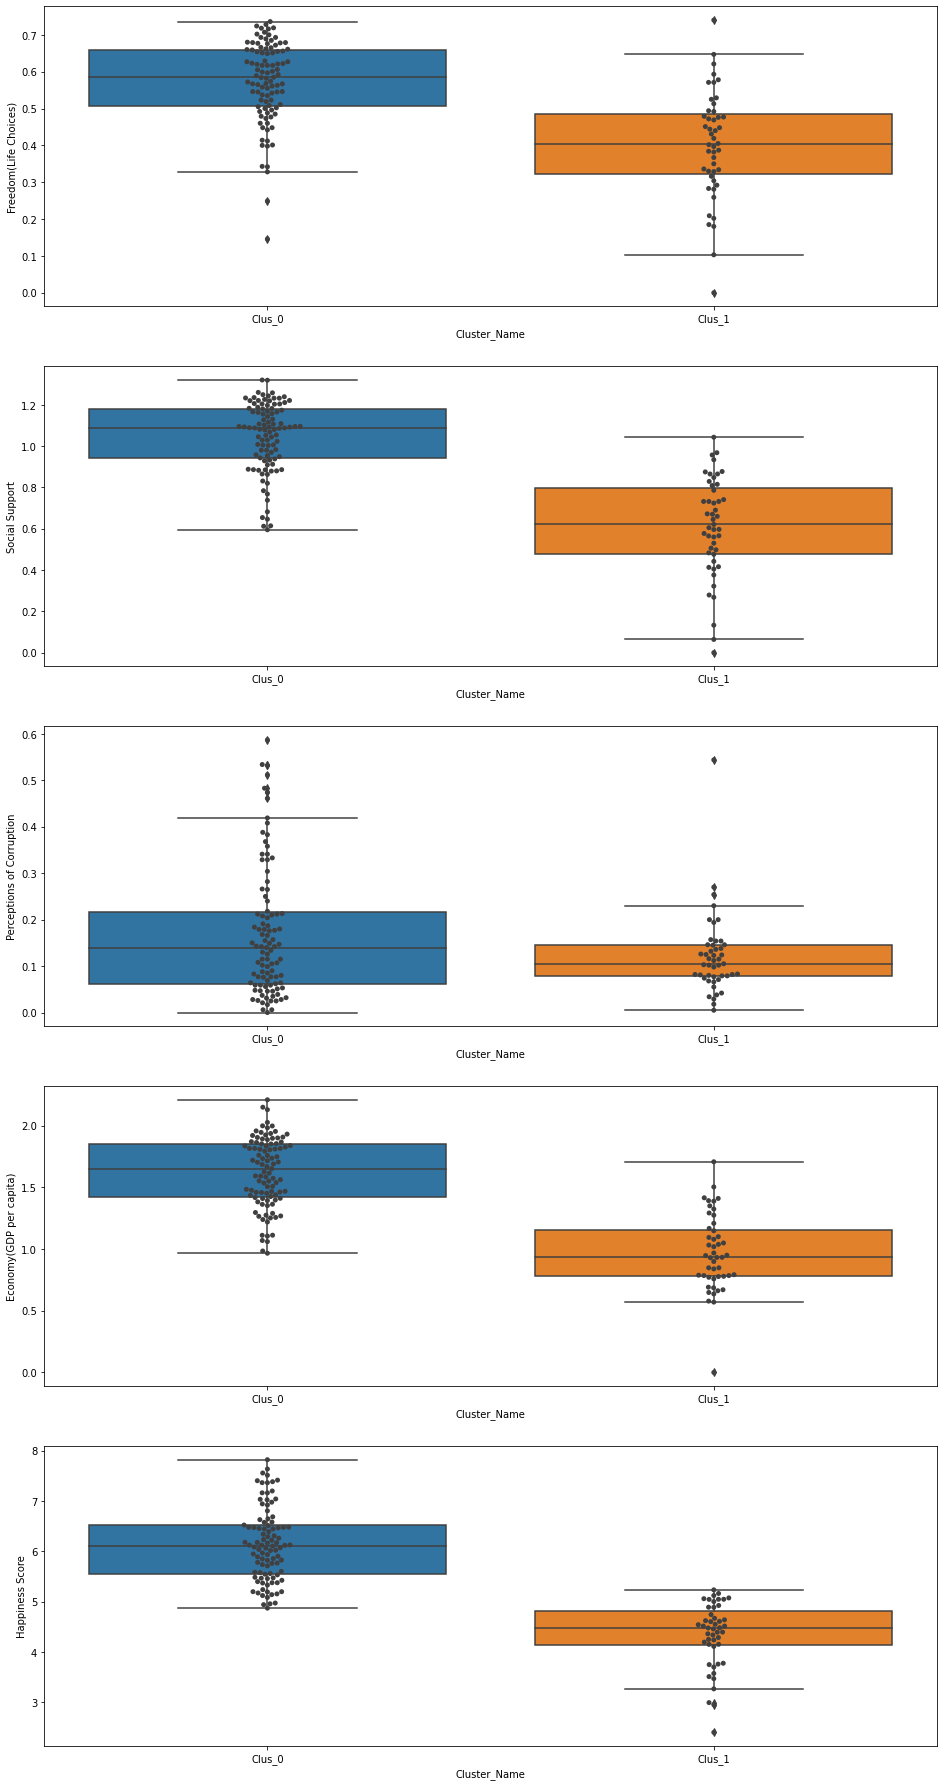

In [20]:
#Plotting Box Plots
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5)
fig.set_figwidth(16)
fig.set_figheight(32)

x = sns.boxplot(x = 'Cluster_Name', y = 'Freedom(Life Choices)', data = df_hr, ax = ax0)
x = sns.swarmplot(x = 'Cluster_Name', y = 'Freedom(Life Choices)', data=df_hr,
                  color= '0.25', ax = ax0)

x = sns.boxplot(x = 'Cluster_Name', y = 'Social Support',data = df_hr, ax = ax1)
x = sns.swarmplot(x = 'Cluster_Name', y = 'Social Support', data=df_hr,
                  color= '0.25', ax = ax1)

x = sns.boxplot(x = 'Cluster_Name', y = 'Perceptions of Corruption',data = df_hr, ax = ax2)
x = sns.swarmplot(x = 'Cluster_Name', y = 'Perceptions of Corruption', data=df_hr,
                  color= '0.25', ax = ax2)


x = sns.boxplot(x = 'Cluster_Name', y = 'Economy(GDP per capita)',data = df_hr, ax = ax3)
x = sns.swarmplot(x = 'Cluster_Name', y = 'Economy(GDP per capita)', data=df_hr,
                  color= '0.25', ax = ax3)

x = sns.boxplot(x = 'Cluster_Name', y = 'Happiness Score',data = df_hr, ax = ax4)
x = sns.swarmplot(x = 'Cluster_Name', y = 'Happiness Score', data=df_hr,
                  color= '0.25', ax = ax4)

*Counties in Cluster 0 seem to enjoy more **freedom** than countries in cluster 1.*

*Citizens of countries in Cluster 0 look more supportive where countries of Cluster 1 get less **family and social support**. People in a country falling in Cluster 1 seem to low family and social support as represented by the outliers of its boxplot*

*As the outliers depict,there are countries in Cluster 0 and Cluster 1 where the government is likely to be **corrupted** beyond the maximum possible limits*

*As we progress from Cluster 0 towards Cluster 1, the **Economy** i.e GDP per capita keeps on reducing.
Countries in Cluster 0 look economically strong*

*Citizens of Countries in Cluster 0 seem to be **happier** than other countries.
Also we can see that citizens of few countries in Cluster 1 are unhappy as they have low happiness score*

**Countries in Cluster 0 are Developed or Developing countries and Countries in Cluster 1 are under Developed**


In [21]:
df_clustered = df_hr.join(df['Country'])

In [22]:
# Ranking of the countries
df_clustered[df_clustered.Country.isin(['India', 'Germany', 'Italy', 'United States','Kyrgyzstan','Cameroon'])]

,Happiness Score,Economy(GDP per capita),Social Support,Healthy Life Expectancy,Freedom(Life Choices),Generosity,Perceptions of Corruption,Dystopia Residual,Cluster_Number,Cluster_Name,Country
13,7.034,1.924,1.088,0.776,0.585,0.163,0.358,2.142,0,Clus_0,Germany
15,6.977,1.982,1.182,0.628,0.574,0.220,0.177,2.214,0,Clus_0,United States
30,6.467,1.834,1.052,0.801,0.412,0.085,0.059,2.222,0,Clus_0,Italy
63,5.828,1.069,1.109,0.638,0.693,0.208,0.025,2.087,0,Clus_0,Kyrgyzstan
101,5.048,0.968,0.672,0.317,0.397,0.152,0.074,2.469,1,Clus_1,Cameroon
135,3.777,1.167,0.376,0.471,0.647,0.198,0.123,0.795,1,Clus_1,India


*Germany and US belonging to Cluster 0 are Developed Countries and have good Happiness Score*

##### Visualizing Clusters using Dendograms
* *The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children.*
* *The top of the U-link indicates a cluster merge.*
* *The two legs of the U-link indicate which clusters were merged.*
* *The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.*

In [23]:
# Setting Cluster Numbers as Index

# Scipy Dendogram works on the index and based on index, Clusters are created
df_hr = df_clustered.set_index('Cluster_Number')
df_hr.index[-10:]

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64', name='Cluster_Number')

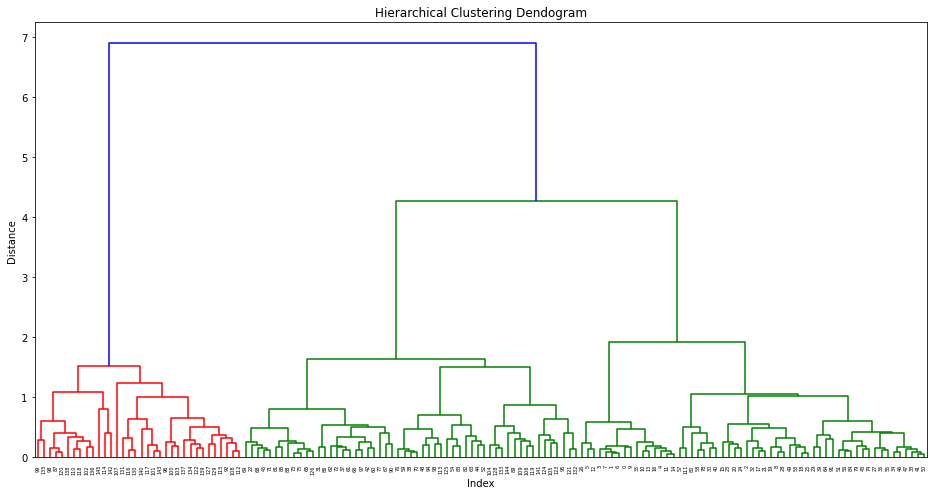

In [24]:
Z = hierarchy.linkage(df_clustered.iloc[:,1:7],method = 'ward')
hierarchy.set_link_color_palette(['r','g','b'])

fig,ax = plt.subplots(figsize=(16,8))

#Plotting the hierarchical clustering as a dendrogram
dendogram1 = hierarchy.dendrogram(Z, ax = ax, above_threshold_color = 'b', orientation = 'top')
#Z = linkage matrix encoding the hierarchical clustering to render as a dendrogram
#Orientation = top :: Plots the root at the top, and plot descendent links going downwards
hierarchy.set_link_color_palette(None) #Reset to default after use

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


*Larger number of Clusters(Countries) are falling in right part of the Dendogram 
OR Developed and Developing Countries are combined together.*

*In this case, two clusters seem to provide better demarkation*

*So a Domain Expert would guide to decide the optimal number of Clusters*